width: 300  height: 327


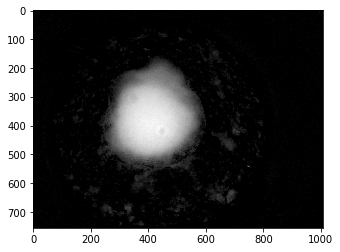

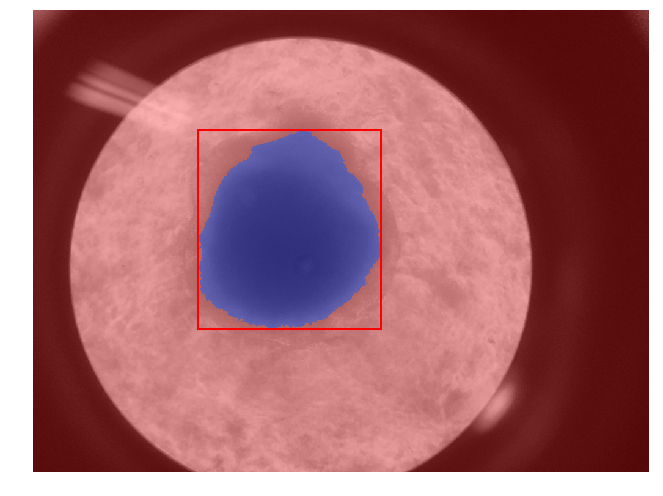

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import data, color
from skimage.util import img_as_ubyte
from skimage.color import rgb2gray
%matplotlib inline  
from skimage.morphology import reconstruction
from skimage.exposure import rescale_intensity

# Load picture and detect edges

imageOriginal = mpimg.imread("/Users/yzhang250/Desktop/IMG_1087.JPG")
image = rgb2gray(imageOriginal)
# resize the images
from skimage.transform import rescale, resize, downscale_local_mean
image = rescale(image, 0.25,mode="constant")

# Label image regions
seed = np.copy(image)
seed[1:-1, 1:-1] = image.max()
mask = image
filled = reconstruction(seed, mask, method='erosion')
plt.imshow(filled-image, cmap='gray')

import matplotlib.patches as mpatches

from skimage import data
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb

imageHole = filled-image

# apply threshold
thresh = threshold_otsu(imageHole)
bw = closing(imageHole > thresh, square(3))

# remove artifacts connected to image border
cleared = clear_border(bw)

# label image regions
label_image = label(cleared)
image_label_overlay = label2rgb(label_image, image=image)

fig, ax = plt.subplots(figsize=(10, 7))
ax.imshow(image_label_overlay)

for region in regionprops(label_image):
    # take regions with large enough areas
    if region.area >= 2000:
        # draw rectangle around segmented coins
        minr, minc, maxr, maxc = region.bbox
        rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                  fill=False, edgecolor='red', linewidth=2)
        ax.add_patch(rect)
        print("width: "+str(maxc - minc)+"  height: "+str(maxr - minr))

ax.set_axis_off()
plt.tight_layout()
plt.show()